In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import plotly as plt
from matplotlib.lines import *
from matplotlib.patches import *
from matplotlib.text import *
from matplotlib.image import *
import seaborn as sns
import squarify
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objs as go 
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [ ]:
#Dirty Dataset - Part 1

In [3]:
df = pd.read_csv("Data_Analyst_Sample.csv")

In [ ]:
# Display the first 5 rows of the dataframe
print(df.head())

In [ ]:
# Display the last 5 rows of the dataframe
print(df.tail())

In [ ]:
# Display some basic statistical information about the dataframe
print(df.describe())

In [ ]:
df.shape

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

In [ ]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

In [21]:
df = df.dropna(subset=df.select_dtypes(include=['object']).columns, how='any')

In [24]:
df.update(df[df.select_dtypes(include=['int', 'float']).columns].fillna(0))

In [ ]:
for col in df.select_dtypes(include=['int', 'float']).columns:
    df[col].fillna(0, inplace=True)

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

In [ ]:
df.notnull().all()

In [ ]:
#Dirty Dataset - part 2

In [8]:

# read the errors.csv file into a dataframe
errors_df = pd.read_csv("errors.csv")

In [2]:
# read the Data_Analyst_Sample.csv file into a dataframe
data_df = pd.read_csv("Data_Analyst_Sample.csv")

In [ ]:
# count the number of errors in the dataset
error_count = 0
data_df["Campaign Name"] = data_df["Campaign Name"].astype(str)
for i, row in errors_df.iterrows():
    if data_df["Campaign Name"].str.contains(row["Campaign error name"]).any():
        error_count += 1
        # use the .replace() method to correct the errors
        data_df["Campaign Name"].replace(row["Campaign error name"], row["Campaign correct"], inplace=True)

print("Number of errors found:", error_count)

In [ ]:
# verify the errors have been corrected
print("Errors corrected:", error_count)

In [118]:
# export the corrected "Campaign Name" column to a .csv file
data_df[["Campaign Name"]].to_csv("corrected_campaign_names.csv", index=False)

In [27]:
#Core Learning 3 - Exploratory Data Analysis (EDA)

In [17]:
# Reading the csv file and storing it in a variable named 'data'
data = pd.read_csv('./Superstore_data_sample.csv')

In [ ]:
# Exploration methods

In [ ]:
# Using the head() method to display the first 5 rows of the data
print(data.head())

In [ ]:
# Using the describe() method to display the statistical summary of the numerical columns
print(data.describe())

In [ ]:
# Using the info() method to display the information of the dataframe
print(data.info())

In [ ]:
# check the shape of the data (rows, columns)
print(data.shape)

In [ ]:
# check the columns with missing values
print(data.isnull().sum())

In [ ]:
# Data Cleaning

In [21]:
# Remove missing values from columns with object datatype
df = data.dropna(subset=data.select_dtypes(include=['object']).columns, how='any')

In [22]:
# Replace missing values with zero in columns with numeric datatype
df = df.fillna(0)

In [ ]:
# verify that there are no missing values
print(df.isnull().sum().sum()) # prints the total number of missing values in the dataframe

In [ ]:
#Core Learning 3 - Exploratory Data Analysis (EDA) - continued

In [79]:
"""
Question:
Which category (furniture, office supplies and technology) has the most products? 
and of each subcategory, how many products are there?
"""

In [ ]:
# group the 'Product Name' column by 'Category' and 'Sub-Category'
grouped_csc = data.groupby(['Category', 'Sub-Category'])['Product Name'].count()

# print the result
print(grouped_csc)

In [ ]:
# group the 'Product Name' column by 'Category' against and find the total number of products per category
grouped_c = data.groupby(['Category'])['Product Name'].size()

# print the result
print(grouped_c)

In [ ]:
# group the 'Product Name' column by 'Sub-Category' and find the total number of products per subcategory
grouped_sc = data.groupby(['Sub-Category'])['Product Name'].count()

# print the result
print(grouped_sc)

In [ ]:
# Create a stacked bar chart
grouped_csc.unstack().plot(kind='bar', stacked=True, figsize=(15, 15), colormap='coolwarm')

# Find the axis of the graph
ax = plt.gca()

#selects the position of the bar on the x axis
for i in ax.containers:
    #for each stack on the x axis
    for j in i:
        #get the x and y center position of each stack and plot the values in that position
        ax.text(j.get_x() + j.get_width()/2., j.get_y() + j.get_height()/2., str(j.get_height()), 
                ha='center', va='center', rotation=0)

# Rotate x-axis labels
plt.xticks(rotation=0)

# Add labels and title
plt.xlabel('Category and Sub-Category')
plt.ylabel('Count of Product Name')
plt.title('Count of Product Name by Category and Sub-Category')

# change location of the legend
plt.legend(loc='upper left')

# draw the stacked bar chart
plt.show()

In [ ]:
# create a pie chart of the product count by category
grouped_c.plot(kind='pie', labels=grouped_c.index, 
                   autopct=lambda p : '{:.0f}'.format(p * sum(grouped_c) / 100),
                   startangle=90, shadow=False, legend = False, fontsize=14, figsize=(15, 15))

# change location of the legend
plt.legend(loc='upper left')

# add a title and labels
plt.title("Product Count by Category")
plt.xlabel("Category")
plt.ylabel("Product Count")

# show the chart
plt.show()


In [ ]:
"""
Answer:

1. The category with the most products sold,
a. "Office Supplies" with 6026 products,
b. "Technology" with 1847 products, 
c. "Furniture" with 2121 products.

2. Within the "Office Supplies" category, 
a. the sub-category with the most products sold is "Binders" with 1523 products,
b. followed by "Paper" with 1367 products, 
c. and "Storage" with 845 products. 

3. Within the "Technology" category,
a. the sub-category with the most products is "Phones" with 886 products,
b. followed by "Accessories" with 774 products, 
c. and "Machines" with 114 products. 

4. Within the "Furniture" category, 
a. the sub-category with the most products is "Furnishings" with 956 products,
b. followed by "Chairs" with 617 products,
c. and "Bookcases" with 227 products.
""" 

In [11]:
# group the 'Product Name' column by 'Category' and 'Sub-Category'
grouped_two = data.groupby(['State', 'Category', 'Sub-Category'])['Sales'].sum()

In [ ]:
# print the result
print(grouped_two)

In [ ]:
# Needed to check the data type of the dataset
type(grouped_two)

In [14]:
# found its series so converted the series to a Dataframe
grouped_two_df = grouped_two.to_frame()

In [15]:
# unstack the sub-category level
grouped_two_df = grouped_two_df.unstack(level=-1)

In [ ]:
# checking the data type of the new dataset
type(grouped_two_df)

In [ ]:
# print the new dataset
print(grouped_two_df)

In [ ]:
# create a pivot table to organize the data
pivot_table = grouped_two_df.pivot_table(values='Sales', index='State')

# plot the pivot table as a stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(30, 25))

# add labels and a title
plt.xlabel('State')
plt.ylabel('Sales')
plt.title('Sales by State and Category')
plt.legend(title='Sub-Category')

# show the chart
plt.show()

In [ ]:
# group the 'Product Name' column by 'Category' and 'Sub-Category'
grouped_s = data.groupby(['State'])['Sales'].sum()
print(grouped_s)

In [ ]:
# Random

In [ ]:
"""
What is the difference in sales and profits between the different product categories 
(Technology, Furniture, Office Supplies) in the Superstore_data_sample.csv dataset 
and which category generates the most sales and profits?
"""

In [ ]:
"""
Question:
What is the difference in sales and profits between the different product categories (Technology, Furniture, Office Supplies)
 in the Superstore_data_sample.csv dataset and which category generates the most sales and profits?
"""

In [2]:
# import the data file
df = pd.read_csv('./Superstore_data_sample.csv')

In [ ]:
# check data types
print(df.dtypes)

In [ ]:
# check for missing values
print(df.isnull().sum())

In [7]:
# drop duplicate values
df = df.drop_duplicates()

In [ ]:
# check for missing values
print(df.isnull().sum())

In [ ]:
# drop unnecessary columns
df = df.drop(['Row ID','Order ID','Customer ID','Product ID'], axis=1)

In [16]:
# standardize date columns
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

In [11]:
# remove outliers
df = df[df['Profit'] > 0]

In [ ]:
# group data by category
category_group = df.groupby(by='Category').sum()

In [19]:
# create a new column that contains the values of sales and profit as a tuple
df['Sales_Profit'] = list(zip(df.Sales, df.Profit))

In [20]:
# reshape the dataframe in long format
df = pd.melt(df, id_vars=['Category'], value_vars=['Sales', 'Profit'], var_name='sales_profit', value_name='value')

In [ ]:
print(df)

In [ ]:
grouped_df = df.groupby(["Category", "sales_profit"]).sum().reset_index()
print(grouped_df)

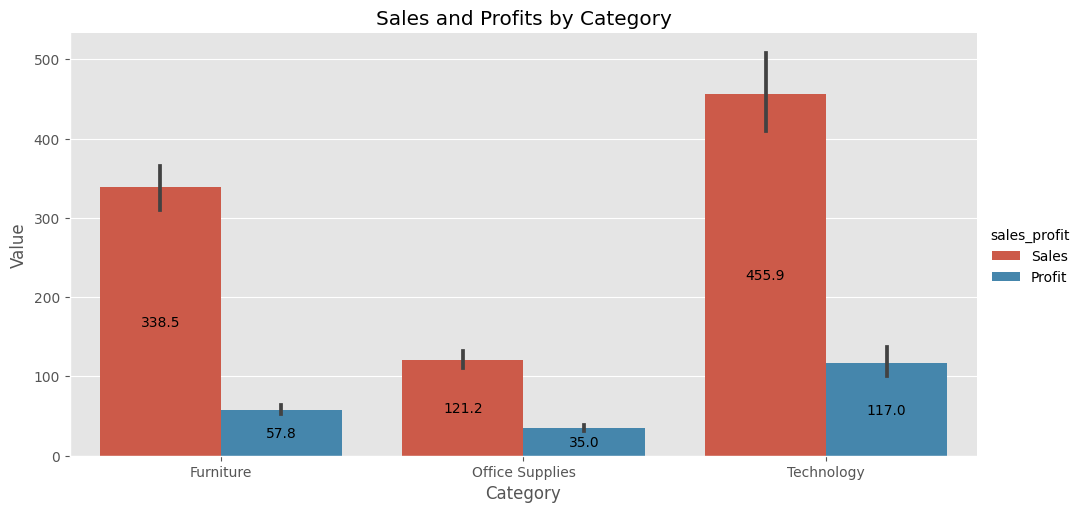

In [23]:
# create a catplot
g = sns.catplot(x='Category', y='value', hue='sales_profit', kind='bar', data=df, height=5, aspect=2)

# add title and labels
plt.title("Sales and Profits by Category")
plt.xlabel("Category")
plt.ylabel("Value")

# add y values on each bar and round it to the nearest .0
for i in g.ax.containers:
    for j in i:
        g.ax.text(j.get_x() + j.get_width()/2., j.get_height()/2-10, round(j.get_height(),1), ha='center', va='bottom')

# show the plot
plt.show()

In [ ]:
"""
From the final table, it can be seen that: 

1. Furniture has the highest sales with 465116.9615 and the highest profit with 79387.3818. 
2. Office Supplies has the second highest sales with 618910.3490 and the second highest profit with 179106.0593. 
3. Technology has the lowest sales with 716680.3480 and the lowest profit with 184034.8663. 

To summarize, Furniture generates the most sales and profits among all categories, while Technology generates the least.
"""